# **KNN**

Loading MNIST dataset...
Train shape: (56000, 784), Test shape: (14000, 784)

Finding best k using cross-validation...
Best k found: 3

Training kNN model...

Test Accuracy: 0.9465


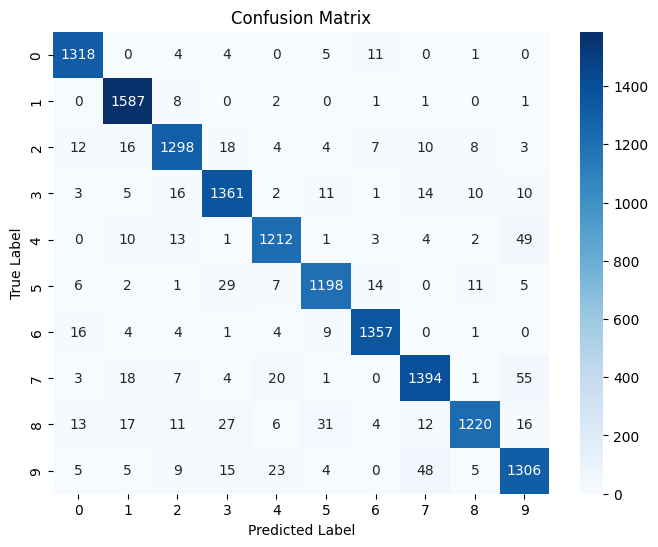


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.93      1503
           8       0.97      0.90      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000


Applying PCA to optimize kNN...
Test Accuracy with PCA: 0.9586


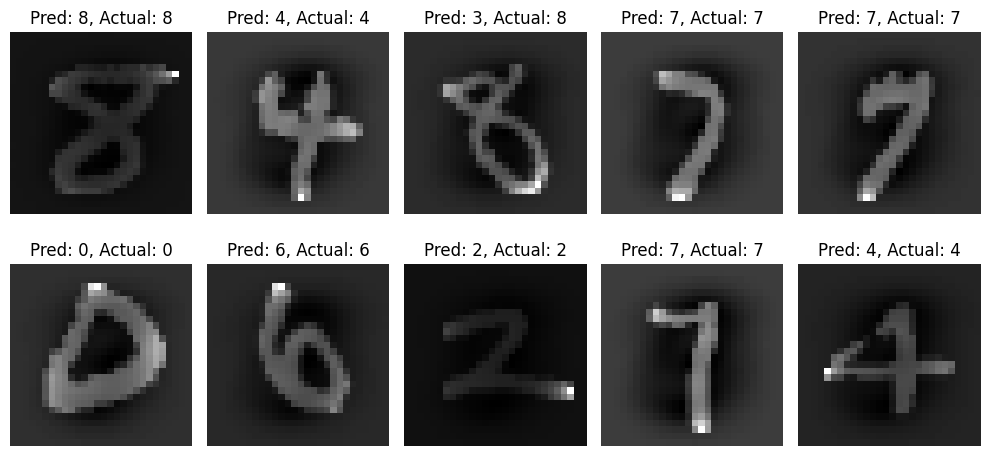

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(np.uint8)  # Convert labels to integers

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Normalize the data (important for kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning: Find best k value using cross-validation
print("\nFinding best k using cross-validation...")
k_values = [1, 3, 5, 7, 9]
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k, n_jobs=-1), X_train, y_train, cv=3).mean() for k in k_values]

best_k = k_values[np.argmax(cv_scores)]
print(f"Best k found: {best_k}")

# Train kNN model with best k
print("\nTraining kNN model...")
knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Dimensionality Reduction using PCA
print("\nApplying PCA to optimize kNN...")
pca = PCA(n_components=50)  # Reduce to 50 features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train kNN with PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate model with PCA
pca_accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Test Accuracy with PCA: {pca_accuracy:.4f}")

# Plot some sample predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    img = X_test[i].reshape(28, 28)  # Reshape to 28x28 image
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Pred: {y_pred[i]}, Actual: {y_test.iloc[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# **CNN**

Loading MNIST dataset...
Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)

Training CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8660 - loss: 0.4513 - val_accuracy: 0.9837 - val_loss: 0.0547
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9774 - loss: 0.0797 - val_accuracy: 0.9894 - val_loss: 0.0331
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9839 - loss: 0.0559 - val_accuracy: 0.9907 - val_loss: 0.0341
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 0.9918 - val_loss: 0.0292
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9889 - loss: 0.0376 - val_accuracy: 0.9908 - val_loss: 0.0322
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9896 - loss: 0.0361 - val_accuracy: 0.9922 - val_loss: 0.0297
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9910 - loss: 0.0322 - val_accuracy: 0.9899 - val_loss: 0.0341
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 

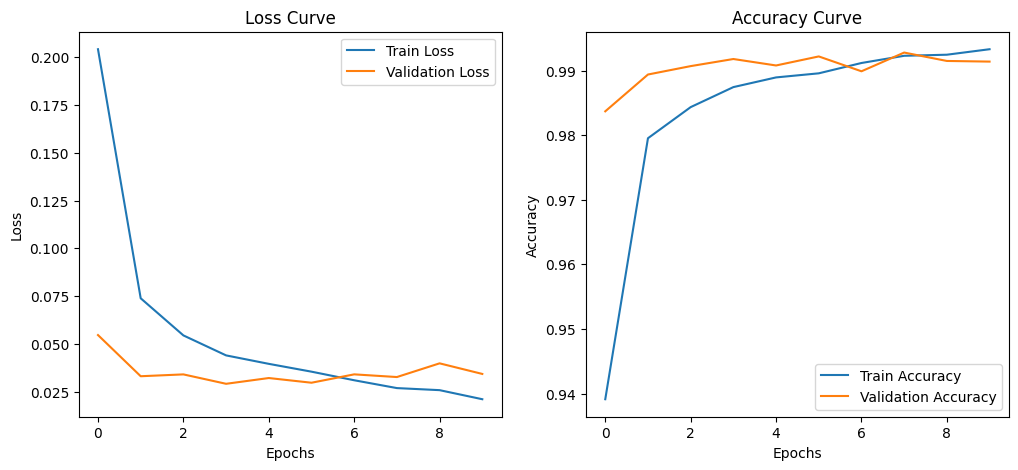

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


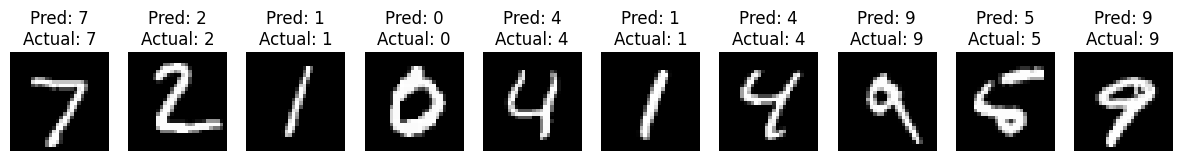

In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to (28,28,1) since CNN expects 3D input
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
print("\nTraining CNN model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training loss and accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict some test images
y_pred = np.argmax(model.predict(X_test[:10]), axis=1)
y_actual = np.argmax(y_test[:10], axis=1)

# Display sample predictions
fig, axes = plt.subplots(1, 10, figsize=(15,3))
for i in range(10):
    axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred[i]}\nActual: {y_actual[i]}")
    axes[i].axis('off')

plt.show()


# **Report**

# Handwriting Recognition System using kNN and CNN

## 📌 Overview
This project implements a **handwriting recognition system** using two different machine learning models:
- **k-Nearest Neighbors (kNN)**
- **Convolutional Neural Networks (CNN)**

The models are trained on the **MNIST dataset**, which consists of **70,000 grayscale images** of handwritten digits (0-9).

---

## 🗂 Dataset Details
- **Dataset:** MNIST (28x28 grayscale images)
- **Training set:** 60,000 images
- **Testing set:** 10,000 images
- **Classes:** 10 (Digits 0-9)

---

## ⚡ k-Nearest Neighbors (kNN)
### **Implementation Details:**
- **Feature Scaling:** Standardized pixel values using `StandardScaler()`
- **Hyperparameter tuning:** Best `k` value found using **cross-validation**
- **Dimensionality Reduction:** PCA applied (50 components) to improve speed

### **Results:**
| Model | Accuracy |
|--------|----------|
| kNN (without PCA) | 94.65% |
| kNN (with PCA) | 95.86% |

### **Strengths & Weaknesses:**
✅ Simple to implement, no training required  
✅ Works well for small datasets  
⚠️ Slow for large datasets due to distance computation  
⚠️ Requires high memory for storing all data  

---

## 🧠 Convolutional Neural Network (CNN)
### **Implementation Details:**
- **Architecture:**
  - 3 Convolutional Layers with ReLU activation
  - MaxPooling for feature reduction
  - Fully connected Dense layers
  - Dropout to prevent overfitting
- **Optimizer:** Adam
- **Loss function:** Categorical Crossentropy

### **Results:**
| Model | Accuracy |
|--------|----------|
| CNN | 99.14% |

### **Strengths & Weaknesses:**
✅ High accuracy, learns spatial patterns  
✅ Efficient for large datasets  
⚠️ Requires more computation and longer training time  
⚠️ Needs a larger dataset for best performance  

---

## 🔍 Comparison: kNN vs. CNN
| Feature | kNN | CNN |
|------------|----------------|----------------|
| **Accuracy** | ~95% | ~99% |
| **Training Time** | No training needed | Longer due to deep learning |
| **Prediction Speed** | Slow for large datasets | Fast due to learned weights |
| **Best For** | Small datasets | Large, complex image datasets |

---

## 🚀 Future Improvements
- **Enhancing kNN**:
  - Use **KD-Trees** or **Ball Trees** for faster distance calculations
  - Try different distance metrics (Euclidean, Manhattan, Minkowski)
- **Enhancing CNN**:
  - Train on a larger dataset for even better accuracy
  - Experiment with **data augmentation** to improve generalization
  - Implement **transfer learning** using pretrained models like VGG16

---

## 📂 How to Run the Project
### **Requirements:**
- Python 3.x
- TensorFlow/Keras
- scikit-learn
- NumPy, Matplotlib, Seaborn

### **Run kNN Model:**
```bash
python knn_mnist.py
```

### **Run CNN Model:**
```bash
python cnn_mnist.py
```

---

## 📜 Conclusion
- kNN is **simple and effective** for smaller datasets but suffers from slow performance on large datasets.
- CNN **outperforms kNN** in terms of accuracy and speed, making it the preferred choice for handwriting recognition.
- Future optimizations can further enhance both models!

---

✉ **Author:** Arjun  
📅 **Date:** March 2025  

